# Titanic Analysis

### Overview

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

I intend to complete the analysis of what sorts of people were likely to survive. In particular, to apply the tools of machine learning to predict which passengers survived the tragedy. 

### Loading Data

Data is given as 2 .csv files containing information of 1,309 passengers (891 of them to be used for training purposes and the other 418 for testing). The data set for training contains a variable that tells us if the passenger survived or not, which is not contained in the data set for training.  

Both data sets contain the following variables:

* PassengerId
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Name: Name ofthe passenger
* Sex: Sex of the passenger
* Age: Age of the passenger (Some entries contain null values)
* SibSp: Number of siblings and spouses of the passenger aboard
* Parch: Number of parents and children of the passenger aboard
* Ticket: Ticket number of the passenger
* Fare: Fare paid by the passenger
* Cabin: Cabin number of the passenger (Some entries contain null values)
* Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

pandas DataFrame will be used to load the data... also, once that the data is split for the first time, it'll be stored in files, so the process can use the same data sets for multiple runs, keeping reproducibility as a key factor in this analysis.

Let's take a look then at the module that loads the data (this module should be ran just once):

In [1]:
# Imports packages that will be used during the process
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split

# Defines a function that splits the data between a training and a test sets
# It needs to do it like this, so we can measure error between prediction and
# test data, to be able to plot complexity graphs that will help me identify
# the best model to use
def split_data(data_to_split, target_to_split):
    # Get the features and targets from the data frame
    x, y = data_to_split, target_to_split

    # Splits the data between training (70%) and testing (30%)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=35)

    return x_train, y_train, x_test, y_test


# Defines a function that loads the original data into a pandas DataFrame
def load_data():
    # Load the dataset
    in_file = 'train.csv'
    full_data = pd.read_csv(in_file)

    return full_data


# Main function
def main():
    # Loads the data
    df_titanic = load_data()

    # Cleans the data:
    #   1. Changes the sex string column into numeric: 1 = female; 2 = male
    #   2. Changes the Embarked character column into numeric: 1 = Cherbourg; 2 = Queenstown; 3 = Southhampton
    #   3. Drops some columns that won't be needed in the analysis
    #   4. Drops the rows where there are NaN values
    
    # 1. Changes the sex string column into numeric: 1 = female; 2 = male
    df_titanic['NumSex'] = np.where(df_titanic['Sex'] == 'female', 1, 2)
    
    # 2. Changes the Embarked character column into numeric: 1 = Cherbourg; 2 = Queenstown; 3 = Southhampton
    df_titanic['NumEmbarked'] = np.where(df_titanic['Embarked'] == 'C', 1,
                                         np.where(df_titanic['Embarked'] == 'Q', 2, 3))
    
    # 3. Drops some columns that won't be needed in the analysis
    df_titanic = pd.DataFrame(df_titanic.drop(['Name', 'Ticket', 'Sex', 'Embarked', 'Cabin'], axis=1))
    
    # 4. Drops the rows where there are NaN values
    df_titanic = df_titanic.dropna(axis=0, how='any')

    # Gets the number of observations in the dataset. This will be used to calculate
    # the number of observations (20%) that will be kept aside for validation at the 
    # end of the process
    total_observations = len(df_titanic)

    # Gets 20% random observations out of the original data set to keep it aside
    # to use as simulations after the model is set-up
    prediction_observations = math.ceil(total_observations * 0.2)
    idx_for_prediction = (random.sample(range(0, total_observations - 1, 1), prediction_observations))
    df_prediction_data = pd.DataFrame(df_titanic.loc[df_titanic.index.isin(idx_for_prediction)])

    # Gets the rest of the original dataset to use for training and testing
    df_train_test_data = pd.DataFrame(df_titanic.loc[~df_titanic.index.isin(idx_for_prediction)])

    # Splits the training and testing data frame
    # First, it takes out the label data from both data sets and creates a new
    # DataFrame with only this data
    df_prediction_survived_data = pd.DataFrame(df_prediction_data[['PassengerId','Survived']])
    df_train_test_survived_data = pd.DataFrame(df_train_test_data[['PassengerId','Survived']])

    # Drops the label data from the training, testing and validation data sets
    df_prediction_data = pd.DataFrame(df_prediction_data.drop('Survived', axis=1))
    df_train_test_data = pd.DataFrame(df_train_test_data.drop('Survived', axis=1))

    # Splits the testing and training data
    x_train, y_train, x_test, y_test = split_data(df_train_test_data.values,
                                                  np.reshape(df_train_test_survived_data['Survived'].values,
                                                             (len(df_train_test_data.values))))

    # Converts the arrays that resulted from the data split to DataFrames so it's
    # easier to save as files. Keep in mind that these files will be the ones that
    # will be loaded by the prediction module
    df_x_train = pd.DataFrame(x_train, columns=df_prediction_data.columns.values.tolist())
    df_y_train = pd.DataFrame(y_train, columns=["Survived"])
    df_x_test = pd.DataFrame(x_test, columns=df_prediction_data.columns.values.tolist())
    df_y_test = pd.DataFrame(y_test, columns=["Survived"])

    # Saves the split data as .csv files in the working directory
    df_x_train.to_csv('x_train.csv', header=True, index=False)
    df_y_train.to_csv('y_train.csv', header=True, index=False)
    df_x_test.to_csv('x_test.csv', header=True, index=False)
    df_y_test.to_csv('y_test.csv', header=True, index=False)
    df_prediction_data.to_csv('x_validation.csv', header=True, index=False)
    df_prediction_survived_data.to_csv('y_validation.csv', header=True, index=False)


main()

### Training and Prediction process

The prediction module will now use these data sets to train, test and validate the model that will predict if a person survived or not the incident. Since this is an historical event, and no new data will be coming in, the validation data set will serve as a simulation of what results the model would return when looking at "new" entries never seen before. Knowing the truth of these entries (i.e. the real outcome for those passengers) will help us evaluate the accuracy and f1-score of the model's prediction's capabilities.

This process will be driven a module that has the follwing steps:

1. Loads the data
2. Strips the data from variables that provide little to none additional data (i.e. PassengerId)
3. Creates a panel of plots with complexity curves for each one of the models that we intend to compare
  * Decision Trees
  * K-Nearest Neighbors (kNN)
  * Boosting
  * RandomForest
  * Support Vector Machine (SVM)
4. Depending on the best model match for the data, it wll train and find the optimal model (i.e. according to variations in the hyper-parameters) using GridSearch
5. Predicts the survival outcome of the validation data using the optimal model and calculates the f1-score
  


Features to use: 

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'NumSex', 'NumEmbarked']


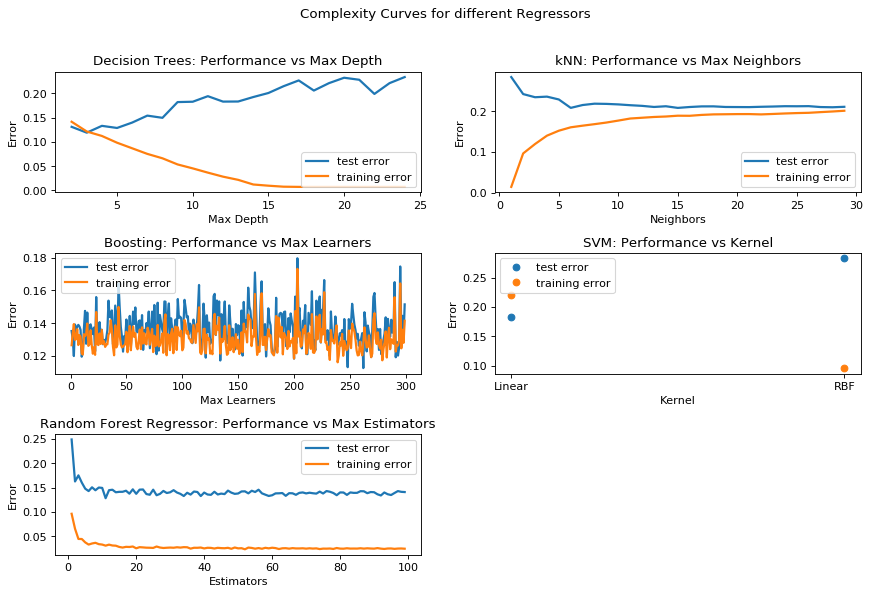


Results (Decision Tree):

Best Parameters for the optimal Decision Tree model is: {'max_depth': 3}

Best Score for the optimal Decision Tree model is: -0.146352343692

             precision    recall  f1-score   support

          0       0.80      0.84      0.82        75
          1       0.68      0.61      0.64        41

avg / total       0.75      0.76      0.76       116



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, classification_report
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor

def split_data(data_to_split, target_to_split):
    # Randomly shuffle the sample set.

    # Get the features and targets from the data frame
    x, y = data_to_split, target_to_split

    # Splits the data between training (70%) and testing (30%)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=35)

    return x_train, y_train, x_test, y_test


def load_data():
    # Load the dataset
    df_x_train = pd.read_csv('x_train.csv')
    df_y_train = pd.read_csv('y_train.csv')
    df_x_test = pd.read_csv('x_test.csv')
    df_y_test = pd.read_csv('y_test.csv')
    df_prediction_data = pd.read_csv('x_validation.csv')
    df_prediction_survived_data = pd.read_csv('y_validation.csv')

    return df_x_train, df_y_train, df_x_test, df_y_test, df_prediction_data, df_prediction_survived_data


def model_complexity(max_complexity, x_train, y_train, x_test, y_test, model_to_use):
    # Calculate the performance of the model as model complexity increases.
    if model_to_use == 'Decision Tree':
        min_complexity = 2
    else:
        min_complexity = 1

    max_level = np.arange(min_complexity, max_complexity)
    train_err = np.zeros(len(max_level))
    test_err = np.zeros(len(max_level))
    svm_kernels = ('linear', 'rbf')

    for i, d in enumerate(max_level):
        if model_to_use == 'Decision Tree':
            # Setup a Decision Tree Regressor so that it learns a tree with depth d
            regressor = DecisionTreeRegressor(max_depth=d)
        elif model_to_use == 'kNN':
            # Setup a kNN Regressor so that it uses d number of neighbors
            regressor = KNeighborsRegressor(n_neighbors=d)
        elif model_to_use == 'Boosting':
            # Setup a AdaBoost Regressor so that it uses d number of learners
            regressor = AdaBoostRegressor(n_estimators=d)
        elif model_to_use == 'RandomForest':
            # Setup a RandomForestRegressor so that it uses d number of learners
            regressor = RandomForestRegressor(n_estimators=d)
        elif model_to_use == 'SVM':
            # Setup a AdaBoost Regressor so that it uses d number of learners
            regressor = svm.SVC(kernel=svm_kernels[i])
        
        # Fit the learner to the training data
        regressor.fit(x_train, y_train)

        # Find the performance on the training set
        train_err[i] = mean_squared_error(y_train, regressor.predict(x_train))

        # Find the performance on the testing set
        test_err[i] = mean_squared_error(y_test, regressor.predict(x_test))

    return train_err, test_err, max_level


def model_complexity_graph(dt_train_err, dt_test_err, knn_train_err, knn_test_err, boost_train_err, boost_test_err,
                           svm_train_err, svm_test_err, rf_train_error, rf_test_error,
                           dt_max_level, knn_max_level, boost_max_level, svm_max_level, rf_max_level):
    # Plot training and test error as a function of the complexity or the regressor

    pl.figure(1, figsize=(13, 8), dpi=80)
    pl.suptitle('Complexity Curves for different Regressors')
    pl.subplot(321)
    pl.title('Decision Trees: Performance vs Max Depth')
    pl.plot(dt_max_level, dt_test_err, lw=2, label='test error')
    pl.plot(dt_max_level, dt_train_err, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Max Depth')
    pl.ylabel('Error')

    pl.subplot(322)
    pl.title('kNN: Performance vs Max Neighbors')
    pl.plot(knn_max_level, knn_test_err, lw=2, label='test error')
    pl.plot(knn_max_level, knn_train_err, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Neighbors')
    pl.ylabel('Error')

    pl.subplot(323)
    pl.title('Boosting: Performance vs Max Learners')
    pl.plot(boost_max_level, boost_test_err, lw=2, label='test error')
    pl.plot(boost_max_level, boost_train_err, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Max Learners')
    pl.ylabel('Error')

    pl.subplot(324)
    ind = np.arange(2)  # the x locations for the groups
    width = 0.35  # the width of the bars: can also be len(x) sequence
    pl.title('SVM: Performance vs Kernel')
    #p1 = pl.bar(ind, svm_test_err, width, color='#d62728')
    #p2 = pl.bar(ind, svm_train_err, width)
    pl.plot(ind, svm_test_err, lw=0, marker="o", label='test error')
    pl.plot(ind, svm_train_err, lw=0, marker="o", label='training error')
    pl.xticks(ind, ('Linear', 'RBF'))
    #pl.legend((p1[0], p2[0]), ('test error', 'training error'))
    pl.legend()
    pl.xlabel('Kernel')
    pl.ylabel('Error')

    pl.subplot(325)
    pl.title('Random Forest Regressor: Performance vs Max Estimators')
    pl.plot(rf_max_level, rf_test_error, lw=2, label='test error')
    pl.plot(rf_max_level, rf_train_error, lw=2, label='training error')
    pl.legend()
    pl.xlabel('Estimators')
    pl.ylabel('Error')

    pl.subplots_adjust(hspace=0.5)

    pl.show()


def fit_predict_model(x_train, y_train, model_to_use):
    # Find and tune the optimal model. Make a prediction on housing data.

    # Setup a Decision Tree Regressor
    if model_to_use == 'Decision Tree':
        # Setup a DecisionTreeRegressor so that it uses d number of depth levels
        regressor = DecisionTreeRegressor()
        parameters = {'max_depth': (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}
    elif model_to_use == 'kNN':
        # Setup a KNeighborsRegressor so that it uses d number of neighbors
        regressor = KNeighborsRegressor()
        parameters = {'n_neighbors': np.linspace(1, 30, 30, dtype=np.int8)}
    elif model_to_use == 'Boosting':
        # Setup a AdaBoostRegressor so that it uses d number of estimators
        regressor = AdaBoostRegressor()
        parameters = {'n_estimators': np.linspace(1, 100, 100, dtype=np.int16)}
    elif model_to_use == 'RandomForest':
        # Setup a RandomForestRegressor so that it uses d number of estimators
        regressor = RandomForestRegressor()
        parameters = {'n_estimators': np.linspace(1, 200, 200, dtype=np.int16)}
    elif model_to_use == 'SVM':
        # Setup a AdaBoost Regressor so that it uses d number of learners
        regressor = svm.SVC()
        #parameters = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')}
        parameters = {'kernel': ('linear', 'rbf')}

    # Uses GridSearch to fine tune the models and find the best one
    # http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html#sklearn.grid_search.GridSearchCV
    trained_model = GridSearchCV(regressor, param_grid=parameters, scoring='neg_mean_squared_error')

    # Fit the learner to the training data
    trained_model = trained_model.fit(x_train, y_train)

    return trained_model


def main():
    # Loads the data.
    # It uses files that were already created with another function to ensure
    # that the data doesn't change
    df_x_train, df_y_train, df_x_test, df_y_test, df_prediction_data, df_prediction_survived_data = load_data()

    # Strips out features that don't add relevant information for the prediction
    #df_x_train = df_x_train.drop(['PassengerId', 'NumEmbarked', 'SibSp', 'Parch', 'Fare', 'Pclass'], axis=1)
    df_x_train = df_x_train.drop(['PassengerId'], axis=1)
    #df_x_test = df_x_test.drop(['PassengerId','NumEmbarked', 'SibSp', 'Parch', 'Fare', 'Pclass'], axis=1)
    df_x_test = df_x_test.drop(['PassengerId'], axis=1)
    #df_prediction_data = df_prediction_data.drop(['PassengerId','NumEmbarked', 'SibSp', 'Parch', 'Fare', 'Pclass'], axis=1)
    df_prediction_data = df_prediction_data.drop(['PassengerId'], axis=1)

    print('')
    print('Features to use: ')
    print('')
    print(df_x_train.columns.values.tolist())


    x_train = np.asarray(df_x_train)
    y_train = np.asarray(df_y_train).ravel()
    x_test = np.asarray(df_x_test)
    y_test = np.asarray(df_y_test).ravel()

    # Shows the complexity curves for each one of the different prediction models
    # so we can compare which one is best

    dt_train_err, dt_test_err, dt_max_level = model_complexity(25, x_train, y_train, x_test, y_test, 'Decision Tree')
    knn_train_err, knn_test_err, knn_max_level = model_complexity(30, x_train, y_train, x_test, y_test, 'kNN')
    boost_train_err, boost_test_err, boost_max_level = model_complexity(300, x_train, y_train, x_test, y_test,
                                                                        'Boosting')
    svm_train_err, svm_test_err, svm_max_level = model_complexity(3, x_train, y_train, x_test, y_test,
                                                                  'SVM')
    rf_train_err, rf_test_err, rf_max_level = model_complexity(100, x_train, y_train, x_test, y_test,
                                                               'RandomForest')
    model_complexity_graph(dt_train_err, dt_test_err, knn_train_err, knn_test_err, boost_train_err, boost_test_err,
                           svm_train_err, svm_test_err, rf_train_err, rf_test_err,
                           dt_max_level, knn_max_level, boost_max_level, svm_max_level, rf_max_level)

    # Starts the training with the best model to use
    model_to_use = 'Decision Tree'
    trained_model = fit_predict_model(x_train, y_train, model_to_use)

    # Gets the optimal model returned by GridSearch
    optimal_model = trained_model.best_estimator_
    print('')
    print('Results (' + model_to_use + '):')
    print('')
    print("Best Parameters for the optimal " + model_to_use + " model is: " + str(trained_model.best_params_))
    print('')
    print("Best Score for the optimal " + model_to_use + " model is: " + str(trained_model.best_score_))

    # Predicts the survival outcome for the validation data set
    will_survive = optimal_model.predict(df_prediction_data)

    # Rounds and convert to integer the results of the prediction
    will_survive = np.round_(will_survive,0).ravel().astype(int)

    # Creates an array with the true survival outcome for each one of the passengers
    # from the validation  data set so it can compare it against the predicted outcome
    did_survive = np.asarray(df_prediction_survived_data['Survived']).ravel().astype(int)

    # Creates an array of the classes predicted to label the classification report
    target_names = ['0','1']

    # Shows the classification results which include f1-score
    print('')
    print(classification_report (did_survive, will_survive, target_names=target_names))
'''
    for i in range(0, len(df_prediction_data)):
        to_predict = np.asarray(df_prediction_data.loc[i]).reshape(1,-1)
        will_survive_2 = optimal_model.predict(to_predict)
        arr_predicted = np.asarray
        print(str(df_prediction_survived_data.loc[i, 'PassengerId']) + ',' + str(np.round_(will_survive_2[0],0)))
        #print(str(np.round_(will_survive_2,0)))
        #print(str(df_prediction_survived_data.loc[i, 'PassengerId']))
'''


main()


### Conclusion

By using decision trees (which scored the best, very close to boosting) the module is able to predict the survival outcome of a passenger in the Titanic with an f1-score of 0.76 in average, achieving a much better score within those passengers that were predicted to not survive.